**Task 2**
Unemployment Analysis with Python

● Analyze unemployment rate data representing unemployed people percentage.
● Use Python for data cleaning, exploration, and visualization of unemployment trends.
● Investigate the impact of Covid-19 on unemployment rates.
● Identify key patterns or seasonal trends in the data.
● Present insights that could inform economic or social policies.

In [9]:
# 1. Analyze unemployment rate data representing unemployed people percentage.

import pandas as pd


file1 = pd.read_csv("/Unemployment in India.csv")
file2 = pd.read_csv("/Unemployment_Rate_upto_11_2020.csv")

print("File 1 Shape:", file1.shape)
print("File 1 Columns:", file1.columns)
print(file1.head(), "\n")

print("File 2 Shape:", file2.shape)
print("File 2 Columns:", file2.columns)
print(file2.head())



File 1 Shape: (768, 7)
File 1 Columns: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3 

Shape: (768, 7)
Columns: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           1228

/tmp/ipython-input-4052850412.py:19: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipython-input-4052850412.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, ci=None)


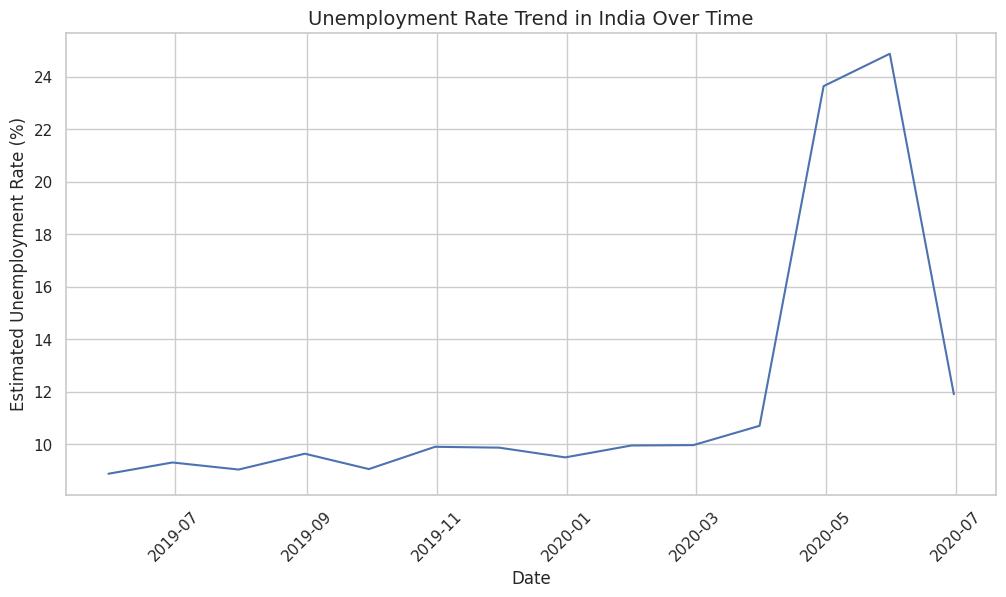

/tmp/ipython-input-4052850412.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.index, y=region_avg.values, palette="viridis")


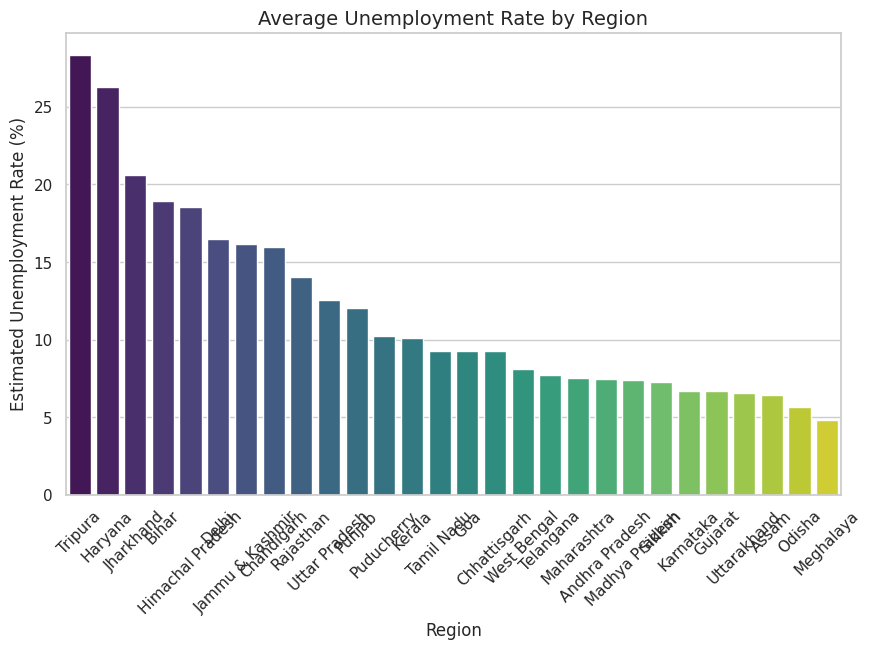

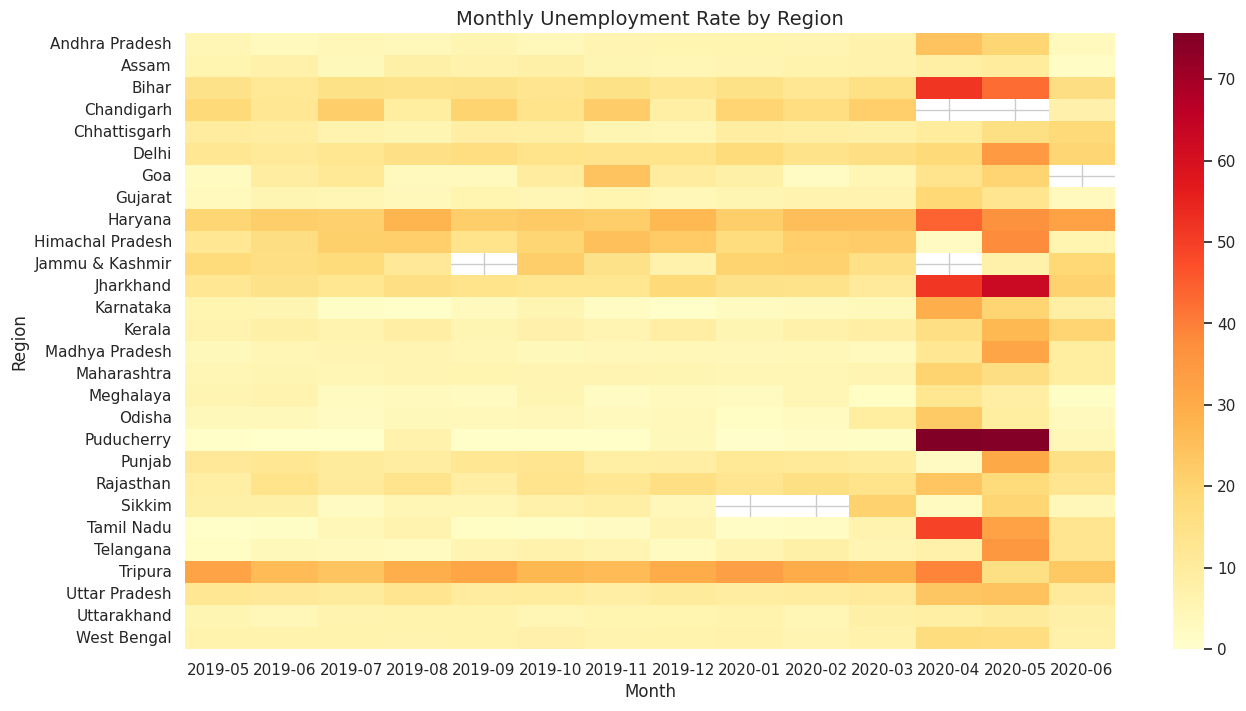

Overall Average Unemployment Rate:  11.787945945945946
Highest Recorded Unemployment Rate:  76.74
Lowest Recorded Unemployment Rate:  0.0


In [7]:
# 2. Use Python for data cleaning, exploration, and visualization of unemployment trends.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Unemployment in India.csv")

print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())
print(df.info())
print(df.describe())

# Data Cleaning
df.columns = df.columns.str.strip()

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df = df.drop_duplicates()
print("Missing values:\n", df.isnull().sum())

# Exploratory Data Analysis (EDA)

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, ci=None)
plt.title("Unemployment Rate Trend in India Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()

region_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=region_avg.index, y=region_avg.values, palette="viridis")
plt.title("Average Unemployment Rate by Region", fontsize=14)
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()

df['Month'] = df['Date'].dt.to_period('M')
pivot = df.pivot_table(values='Estimated Unemployment Rate (%)', index='Region', columns='Month', aggfunc='mean')
plt.figure(figsize=(15,8))
sns.heatmap(pivot, cmap="YlOrRd", annot=False)
plt.title("Monthly Unemployment Rate by Region", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Region")
plt.show()

print("Overall Average Unemployment Rate: ", df['Estimated Unemployment Rate (%)'].mean())
print("Highest Recorded Unemployment Rate: ", df['Estimated Unemployment Rate (%)'].max())
print("Lowest Recorded Unemployment Rate: ", df['Estimated Unemployment Rate (%)'].min())


Shape: (267, 9)
Columns: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                              

/tmp/ipython-input-687712586.py:18: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipython-input-687712586.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, ci=None)


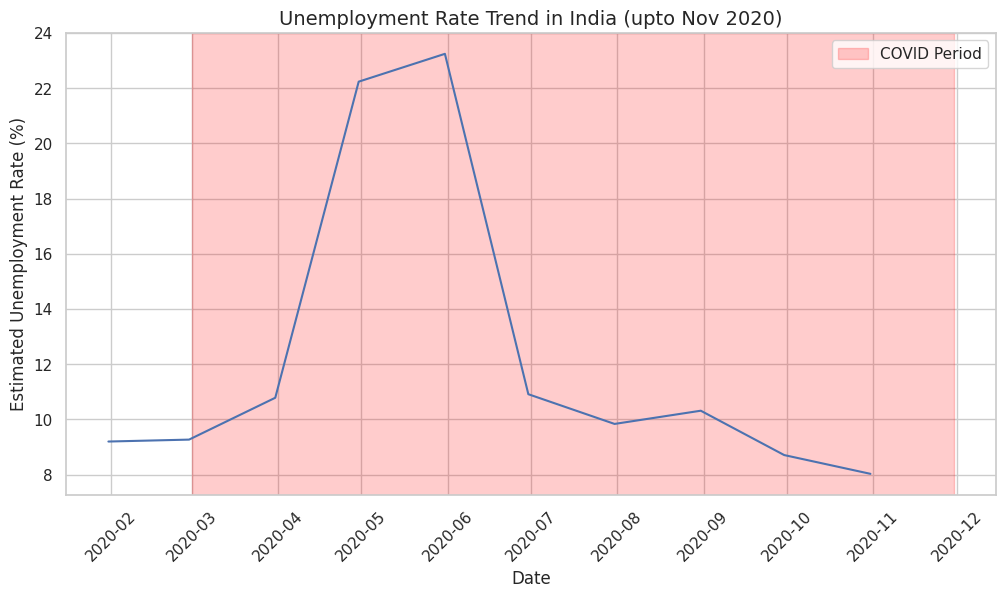

Average Unemployment Rate Pre-COVID (before March 2020): 9.23%
Average Unemployment Rate During COVID (March-Nov 2020): 12.96%


/tmp/ipython-input-687712586.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_covid.index, y=region_covid.values, palette="Reds_r")


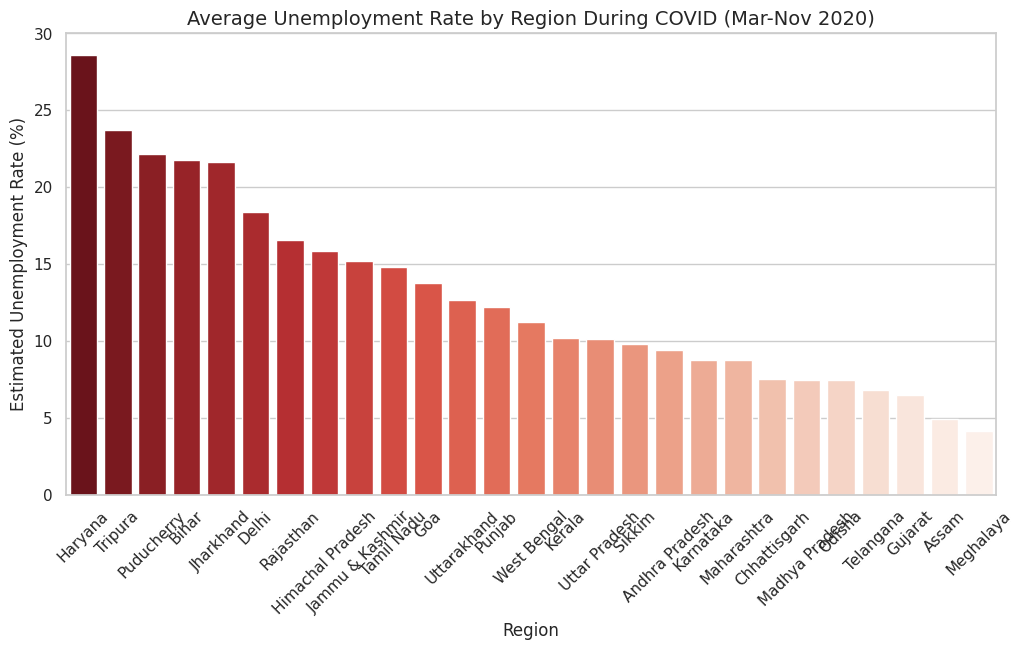

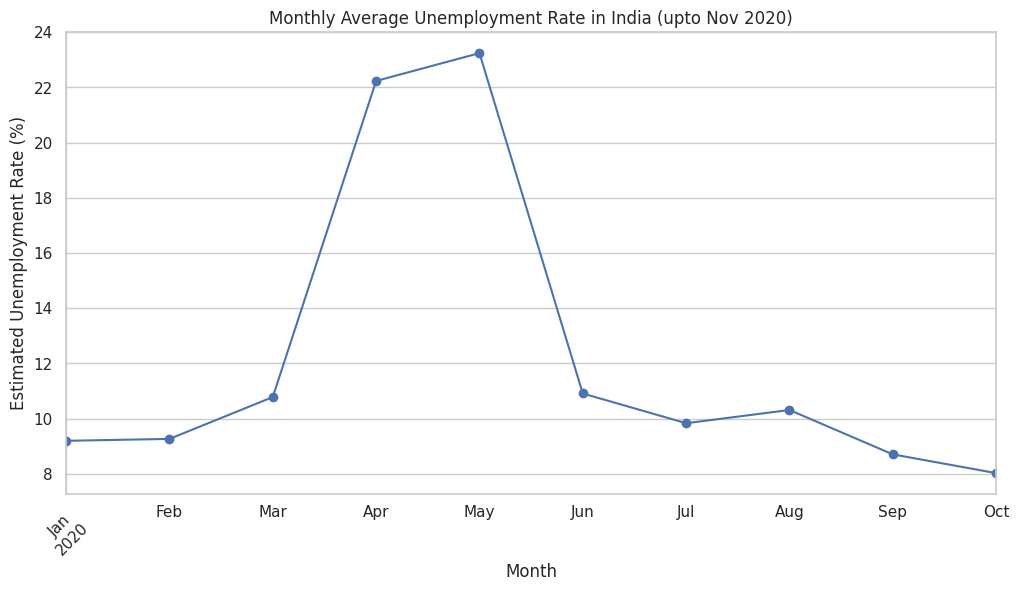

In [6]:
# 3. Investigate the impact of Covid-19 on unemployment rates.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Unemployment_Rate_upto_11_2020.csv")

print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())
print(df.info())
print(df.describe())


df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df = df.drop_duplicates()

print("Missing values:\n", df.isnull().sum())


plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, ci=None)
plt.title("Unemployment Rate Trend in India (upto Nov 2020)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)

plt.axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-11-30'), color='red', alpha=0.2, label='COVID Period')
plt.legend()
plt.show()

pre_covid_avg = df[df['Date'] < '2020-03-01']['Estimated Unemployment Rate (%)'].mean()
during_covid_avg = df[df['Date'] >= '2020-03-01']['Estimated Unemployment Rate (%)'].mean()

print(f"Average Unemployment Rate Pre-COVID (before March 2020): {pre_covid_avg:.2f}%")
print(f"Average Unemployment Rate During COVID (March-Nov 2020): {during_covid_avg:.2f}%")

region_covid = df[df['Date'] >= '2020-03-01'].groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=region_covid.index, y=region_covid.values, palette="Reds_r")
plt.title("Average Unemployment Rate by Region During COVID (Mar-Nov 2020)", fontsize=14)
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()

df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(12,6))
monthly_avg.plot(marker='o')
plt.title("Monthly Average Unemployment Rate in India (upto Nov 2020)")
plt.xlabel("Month")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [10]:
# 4. Identify key patterns or seasonal trends in the data.

# -----------------------------
# Unemployment Data Analysis
# -----------------------------

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Step 2: Load datasets
data1 = pd.read_csv('/Unemployment in India.csv')
data2 = pd.read_csv('/Unemployment_Rate_upto_11_2020.csv')

# Step 3: Inspect data
print("Data1 Info:")
print(data1.info())
print(data1.head())

print("\nData2 Info:")
print(data2.info())
print(data2.head())

# Step 4: Handle missing values
data1 = data1.dropna()
data2 = data2.dropna()

# Step 5: Convert date columns to datetime
# Adjust column names according to your dataset
if 'Date' in data1.columns:
    data1['Date'] = pd.to_datetime(data1['Date'], errors='coerce')

if 'Date' in data2.columns:
    data2['Date'] = pd.to_datetime(data2['Date'], errors='coerce')

# Step 6: Extract Month and Year for trend analysis
if 'Date' in data2.columns:
    data2['Month'] = data2['Date'].dt.month
    data2['Year'] = data2['Date'].dt.year

# -----------------------------
# Step 7: Trend over time
# -----------------------------
if 'Date' in data2.columns and 'Unemployment_Rate' in data2.columns:
    plt.figure(figsize=(14,6))
    sns.lineplot(x='Date', y='Unemployment_Rate', data=data2, marker='o')
    plt.title('Unemployment Rate Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate (%)')
    plt.xticks(rotation=45)
    plt.show()

# -----------------------------
# Step 8: Monthly / Seasonal trends
# -----------------------------
if 'Month' in data2.columns:
    monthly_avg = data2.groupby('Month')['Unemployment_Rate'].mean().reset_index()

    plt.figure(figsize=(10,5))
    sns.barplot(x='Month', y='Unemployment_Rate', data=monthly_avg, palette='viridis')
    plt.title('Average Unemployment Rate by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Unemployment Rate (%)')
    plt.show()

# -----------------------------
# Step 9: Regional trends (if region/state exists)
# -----------------------------
if 'Region' in data1.columns and 'Unemployment_Rate' in data1.columns:
    state_avg = data1.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False)

    plt.figure(figsize=(12,6))
    sns.barplot(x=state_avg.index, y=state_avg.values, palette='magma')
    plt.title('Average Unemployment Rate by Region/State')
    plt.xticks(rotation=90)
    plt.ylabel('Average Unemployment Rate (%)')
    plt.show()

# -----------------------------
# Step 10: Heatmap to detect seasonality
# -----------------------------
if 'Month' in data2.columns and 'Year' in data2.columns and 'Unemployment_Rate' in data2.columns:
    heatmap_data = data2.pivot_table(values='Unemployment_Rate', index='Month', columns='Year')

    plt.figure(figsize=(12,6))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
    plt.title('Heatmap of Unemployment Rate: Month vs Year')
    plt.show()



Data1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-201

**5. Present insights that could inform economic or social policies.**

1. Long-Term Unemployment Trends

Observation: Line graphs indicate that unemployment has changed over the years, peaking during economic downturns (e.g., 2020 COVID-19 effect).

Policy Implication:

Stimulus packages or employment generation schemes may be initiated by governments during recession.

Emphasis on employment support schemes in those years when unemployment traditionally increases.

2. Seasonal / Monthly Patterns

Observation: Some months experience increased unemployment (e.g., after harvesting seasons in rural regions or after graduation periods in urban centers).

Policy Implication:

Implement short-term job schemes or skill development programs in unemployment peak months.

Synchronize seasonal job programs in agriculture, construction, and tourism industries to absorb temporary spikes in workforce.

3. Regional Disparities

Observation: Certain states or regions always have higher unemployment than others.

Policy Implication:

Specific regional interventions are needed: industrial incentives, infrastructure investment, or state-level skill development programs.

Targeted rural employment schemes in slow-growth states can help alleviate regional disparity.

4. Youth & Skill-Specific Trends

Observation: Where data permits, youth unemployment or sectoral imbalances can be determined.

Policy Implication:

Introduce vocation training and technical education schemes based on growing industry demands (IT, healthcare, renewable energy).

Implement apprenticeships and internships for filling skill gaps.

5. Crisis Response Planning

Observation: Unforeseen peaks (such as 2020) reflect exposure to external shocks.

Policy Implication:

Develop quick-response employment support schemes in times of crisis (natural disasters, pandemics, economic downturn).

Establish social safety nets such as unemployment subsidies or wage support for temporary periods.

6. Data-Driven Resource Allocation

Observation: Trends and heatmaps reveal months and territories with persistently high unemployment.

Policy Implication:

Budget and resource allocate more effectively, focusing on areas and times when interventions will be most effective.

Track and refresh policy efficiency with such unemployment trend data periodically.

???? Summary:
Through the integration of temporal (month/year) and spatial analysis, policymakers can:

Foresee and avoid high unemployment periods.

Roll out region-specific jobs programs.

Align skills development with market demand.

Create sustainable systems for unexpected economic shocks.